In [1]:
import os.path

import numpy as np
import qutip
import matplotlib.pyplot as plt
import matplotlib
import pickle

import scipy.constants as sc
import scipy as sp

from lattice import boltzman_dist, occupation

In [2]:
fname = 'sim_tweezer_Li_20220419_1228'
f = os.path.join(os.path.realpath('.'), 'Output', fname)

with open(f, 'rb') as filein:
    data = pickle.load(filein)

with open(f + '_SIMPARAMS', 'rb') as filein:
    sim_params = pickle.load(filein)

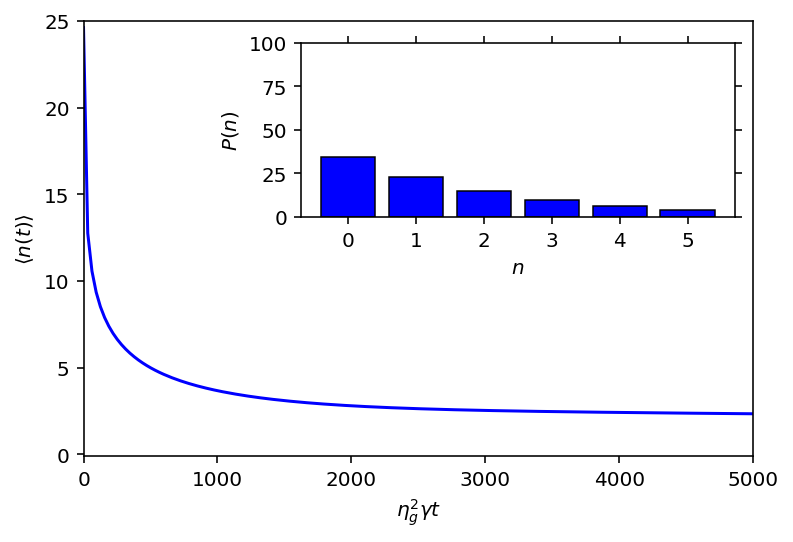

In [4]:
fig = plt.figure(dpi=72*2)
ax = plt.gca()

#######################################
# PRINT ANALYTIC AND WFMC SIM RESULTS #
#######################################
# analytic
times = data['times'] * data['time factor']
nvt = data['occupation']

ax.plot(times, nvt, c='b')

# wfmc
#times = data_wfmc.times * data['time factor']
#nvt = nvt_wfmc

#ax.plot(times, nvt, ls='', c='b', marker='.')

ax.set_ylim(-0.1, 25)
ax.set_xlim(left=0, right=5000)

####################################
# INSET FOR OCCUPATION PROBABILITY #
# (after cooling)                  #
####################################
plt.rcParams['hatch.linewidth'] = 0.5
with plt.rc_context({'xtick.minor.visible': False, 'ytick.minor.visible': False}):
    # axes definition
    height = 0.4
    axins = ax.inset_axes([0.325, 0.55, height * 1.618, height])
#   rect = matplotlib.patches.Rectangle((1.3, 47), 5.1, 101, linewidth=1, edgecolor='k',facecolor='w')
#   ax.add_patch(rect)
    
    # plot probabilities
    width = 0.8
    N = 6

    pns = data['probabilities']
    axins.bar(np.arange(N), pns[-1][:N]*100, color='b', edgecolor='k', linewidth=0.75)

    axins.set_xticks(range(N))
    axins.set_yticks([0, 25, 50, 75, 100])

# Axes labels and ticks
ax.set(xlabel=r'$\eta_g^2 \gamma t$', ylabel=r"$\langle n(t) \rangle$")

axins.set(xlabel=r"$n$", ylabel=r"$P(n)$")
axins.tick_params(top=True, right=True, which='major')

plt.show()